In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\InsuranceData.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
for i in data.columns:
    column_values=data[i].values
    unique_values=np.unique(column_values)
    print(unique_values)
    print('\n')

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


['female' 'male']


[15.96  16.815 17.195 17.29  17.385 17.4   17.48  17.67  17.765 17.8
 17.86  17.955 18.05  18.3   18.335 18.5   18.6   18.715 18.905 19.
 19.095 19.19  19.3   19.475 19.57  19.8   19.855 19.95  20.045 20.1
 20.13  20.235 20.3   20.35  20.4   20.425 20.52  20.6   20.615 20.7
 20.79  20.8   20.9   21.01  21.09  21.12  21.28  21.3   21.375 21.4
 21.47  21.5   21.56  21.565 21.66  21.7   21.755 21.78  21.8   21.85
 21.89  21.945 22.    22.04  22.1   22.135 22.22  22.23  22.3   22.42
 22.515 22.6   22.61  22.705 22.77  22.8   22.88  22.895 22.99  23.
 23.085 23.1   23.18  23.2   23.21  23.275 23.3   23.32  23.37  23.4
 23.465 23.54  23.56  23.6   23.65  23.655 23.7   23.75  23.76  23.8
 23.845 23.87  23.9   23.94  23.98  24.035 24.09  24.1   24.13  24.225
 24.3   24.31  24.32  24.4   24.415 24.42  24.51  24.53  24.6   24.605
 2

 categorical Columns like sex,Region,Smoker has been label encoded

In [8]:
#Label Encoding on categorical features 

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [9]:
#Correlation Analysis of target column with other features

data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

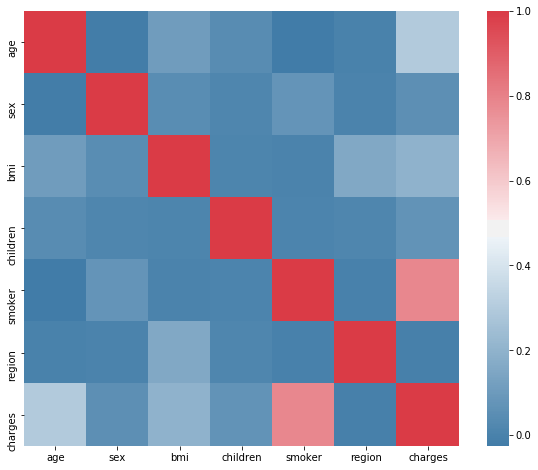

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Frequency Histogram of Charges')]

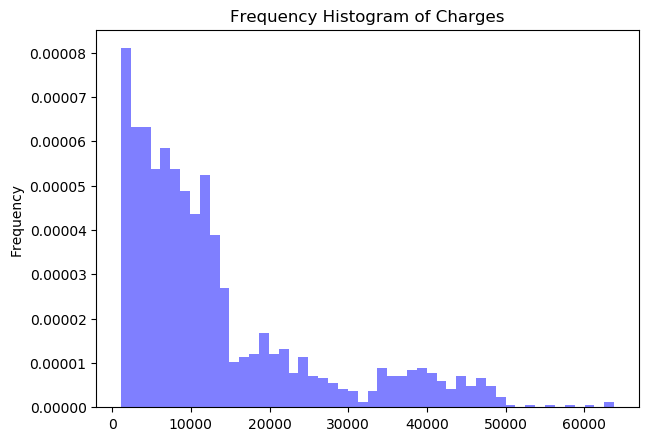

In [12]:
#Distribution of charges ie target column

%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

# Plot Histogram on x

plt.hist(data.charges, **kwargs , color='b')
plt.gca().set(title='Frequency Histogram of Charges', ylabel='Frequency')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

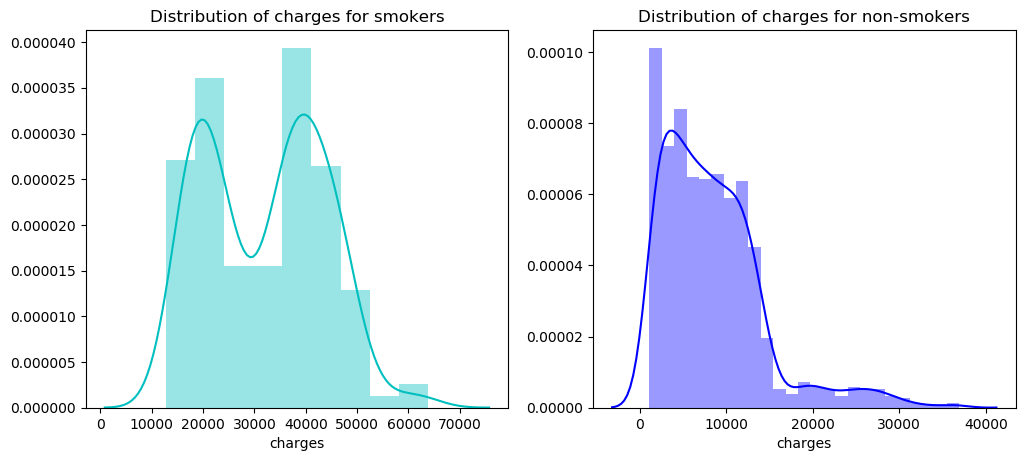

In [14]:
#Distribution of target columns with respect to smoking column

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

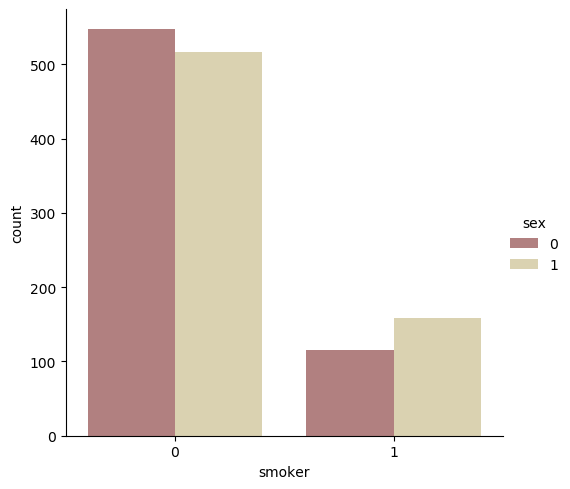

In [15]:
#Smoker by gender  - Women -1 , Men - 0

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

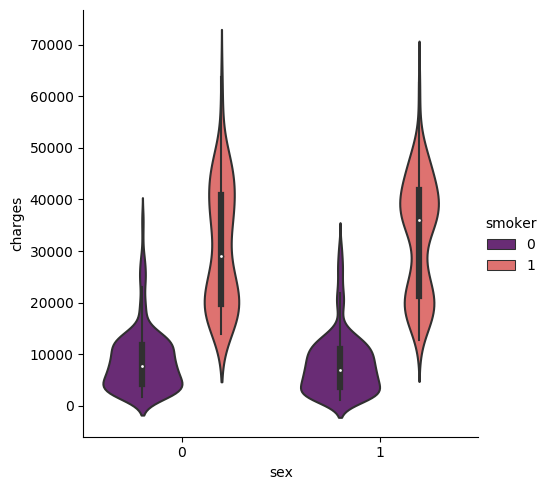

In [16]:
#

sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

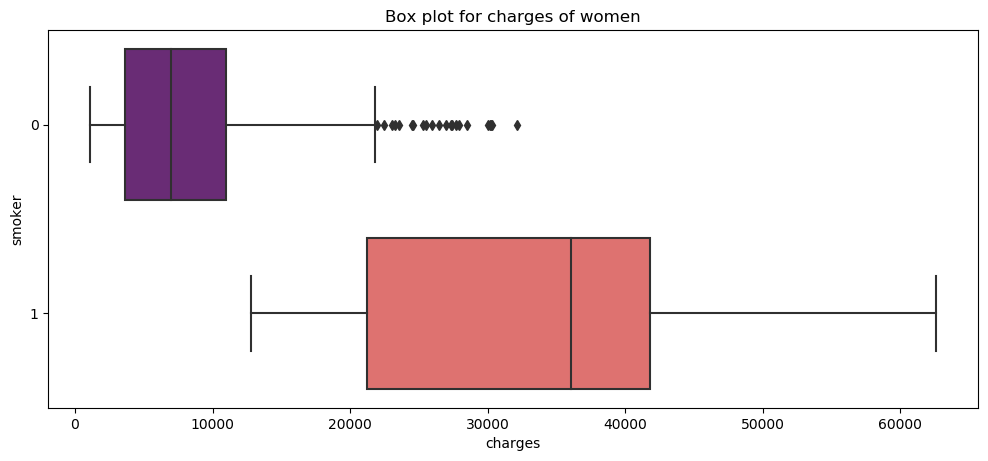

In [17]:
#Box plot analysis for charges for women

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

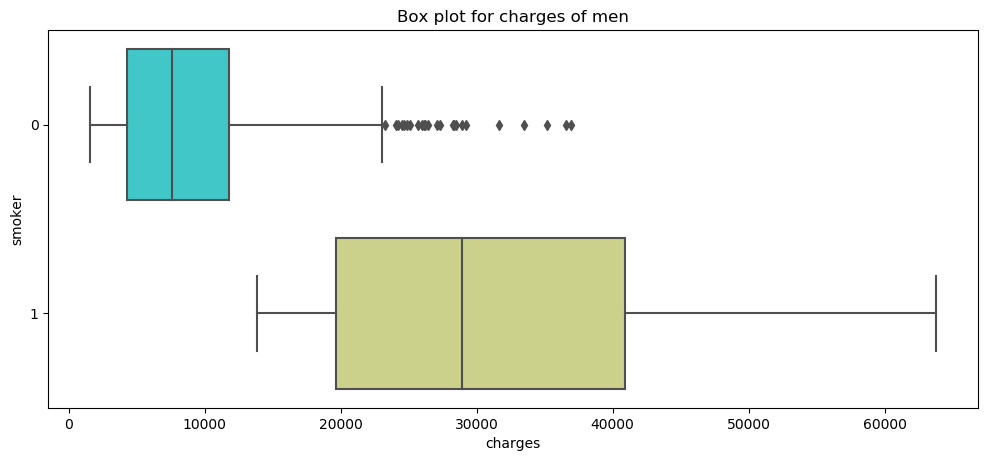

In [18]:
#Box plot for charges of men

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

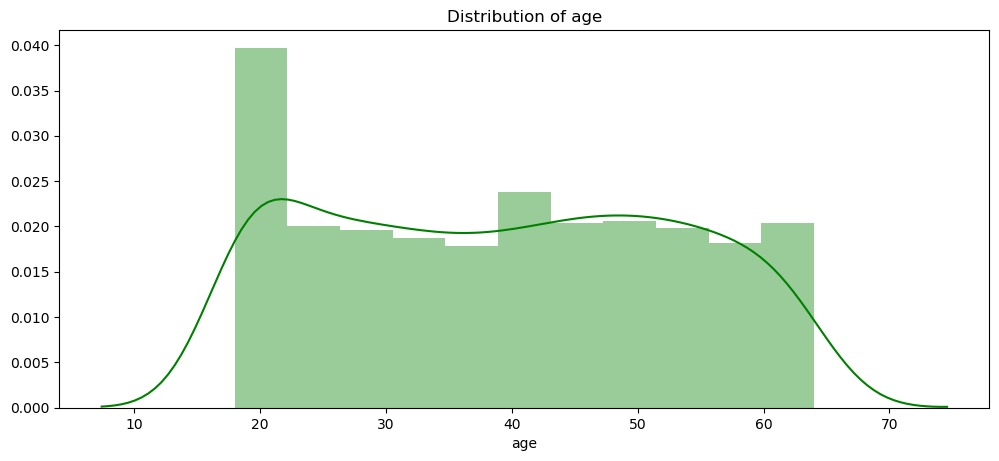

In [19]:
#Effect of Age on charges of treatment
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

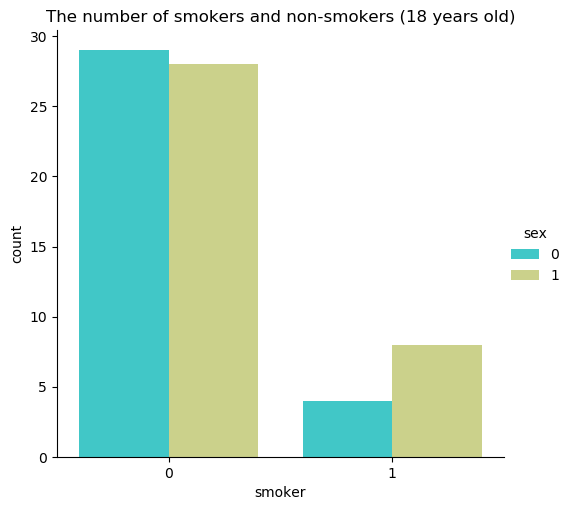

In [20]:
#Analysis of 18 years of somkers and non smokers 

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

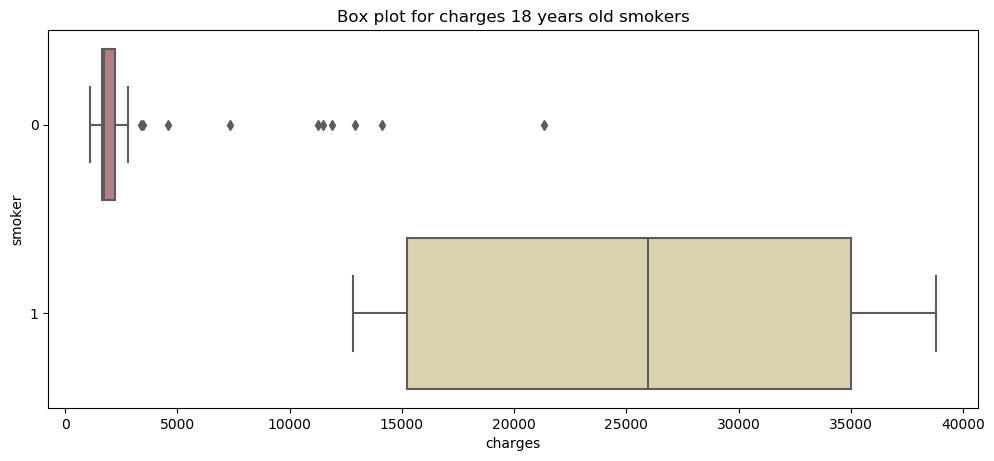

In [21]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1, 'Distribution of charges and age for non-smokers')

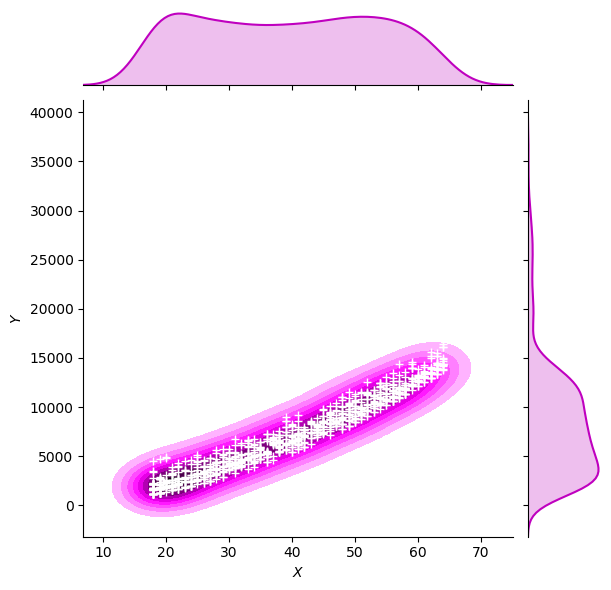

In [23]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1, 'Distribution of charges and age for smokers')

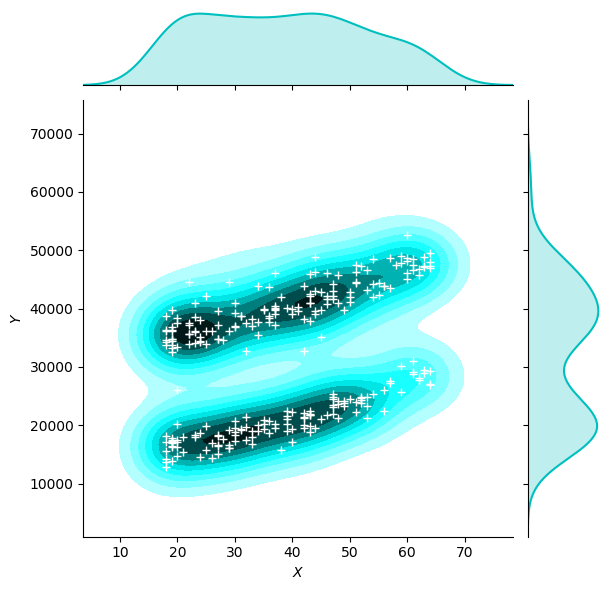

In [24]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

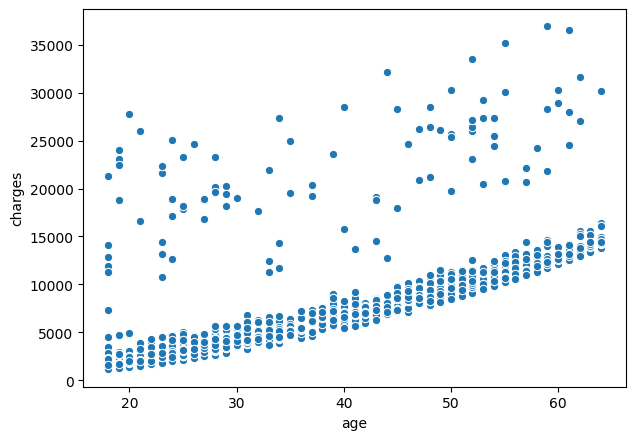

In [26]:
#non - smokers
cmap = sns.cubehelix_palette(dark=0.3, light=0.8, as_cmap=True)
ax=sns.scatterplot(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges,sizes=(20, 200), palette=cmap)

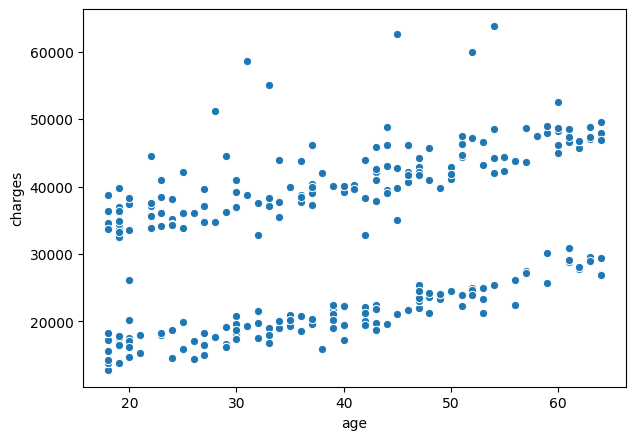

In [27]:
#smokers
ax=sns.scatterplot(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges,sizes=(20, 200), palette=cmap)


C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Smokers and non-smokers')

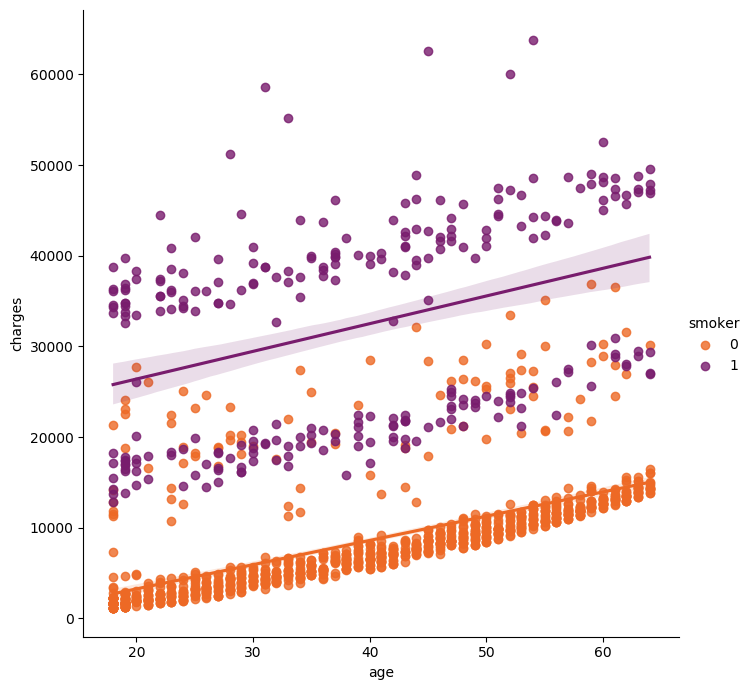

In [28]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

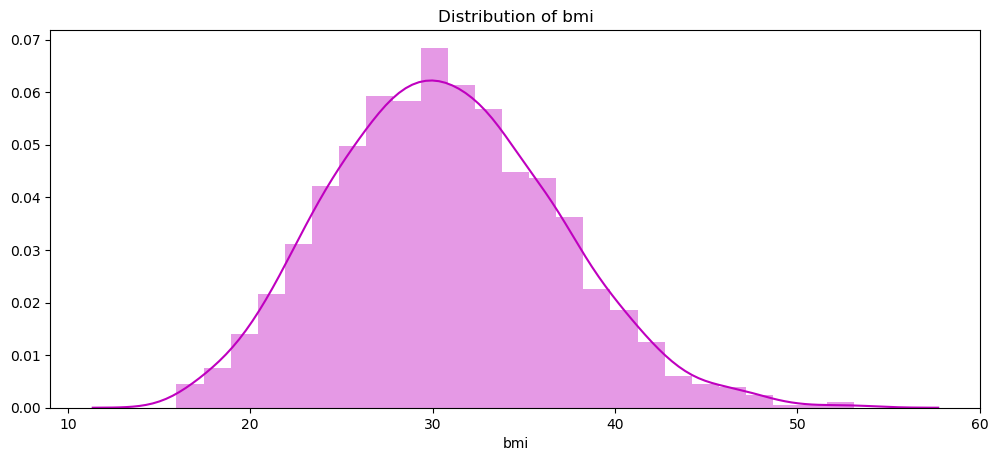

In [29]:
#BMI analysis 

plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

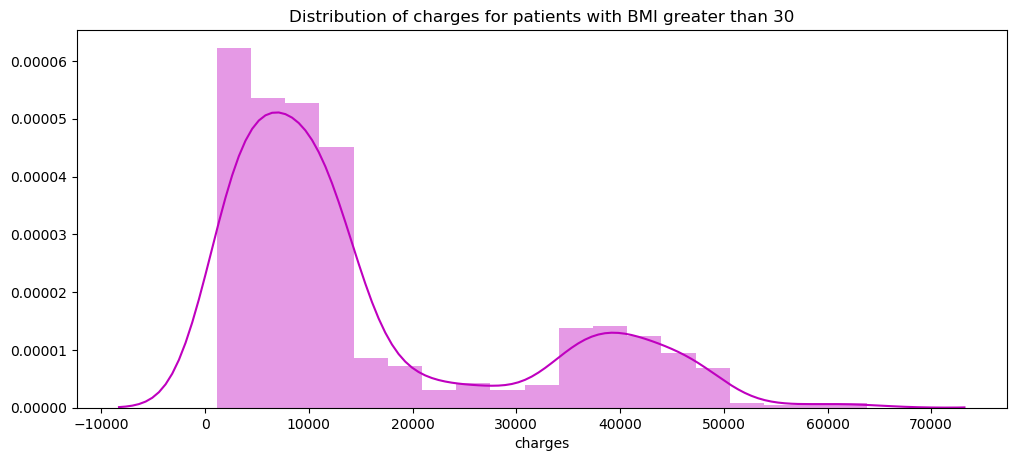

In [30]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')


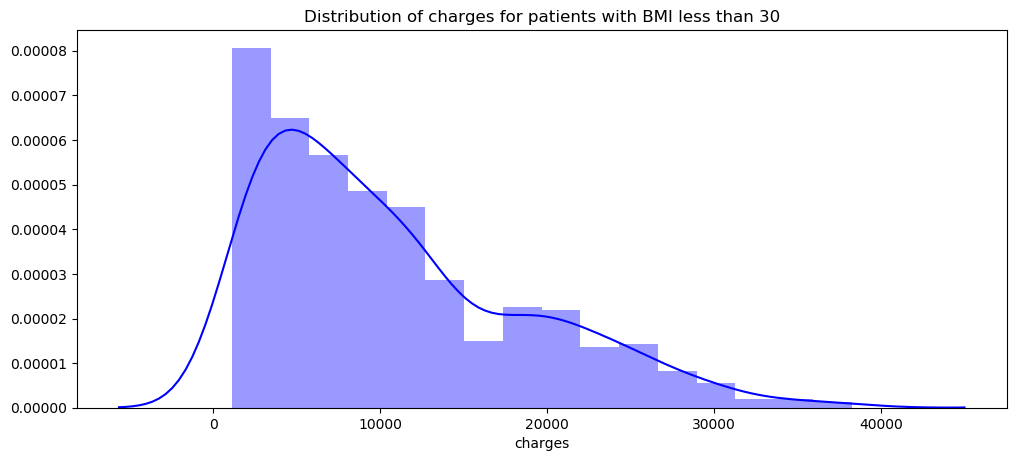

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1, 'Distribution of bmi and charges')

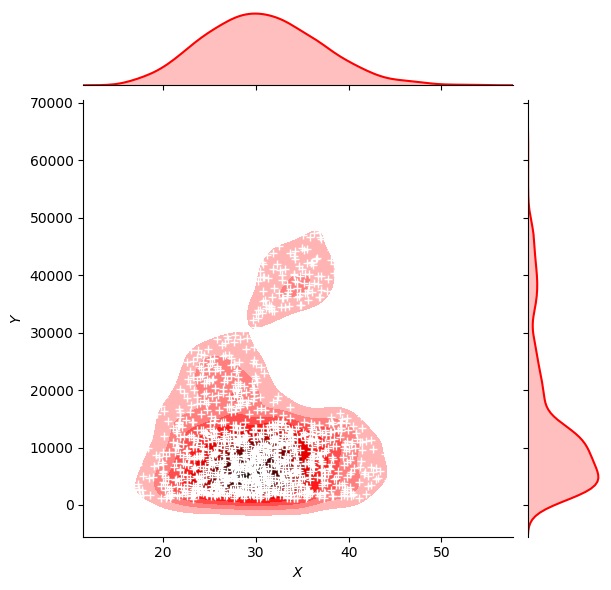

In [33]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


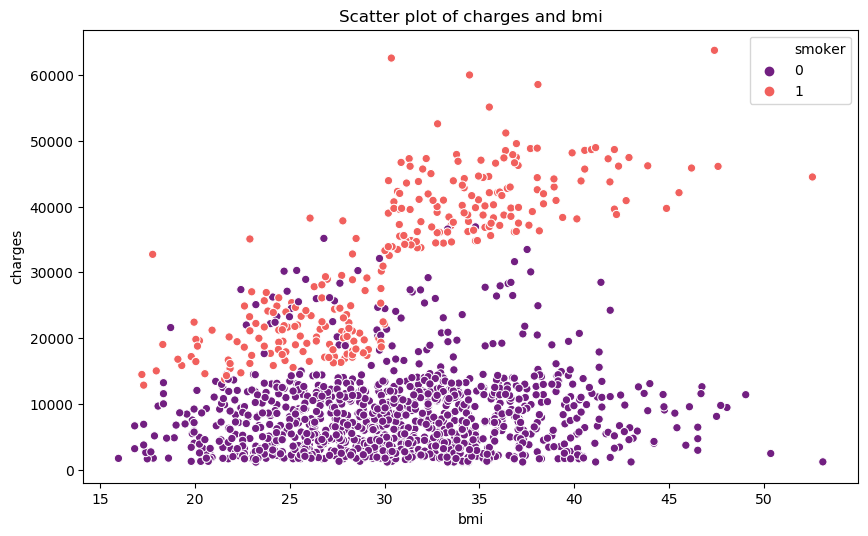

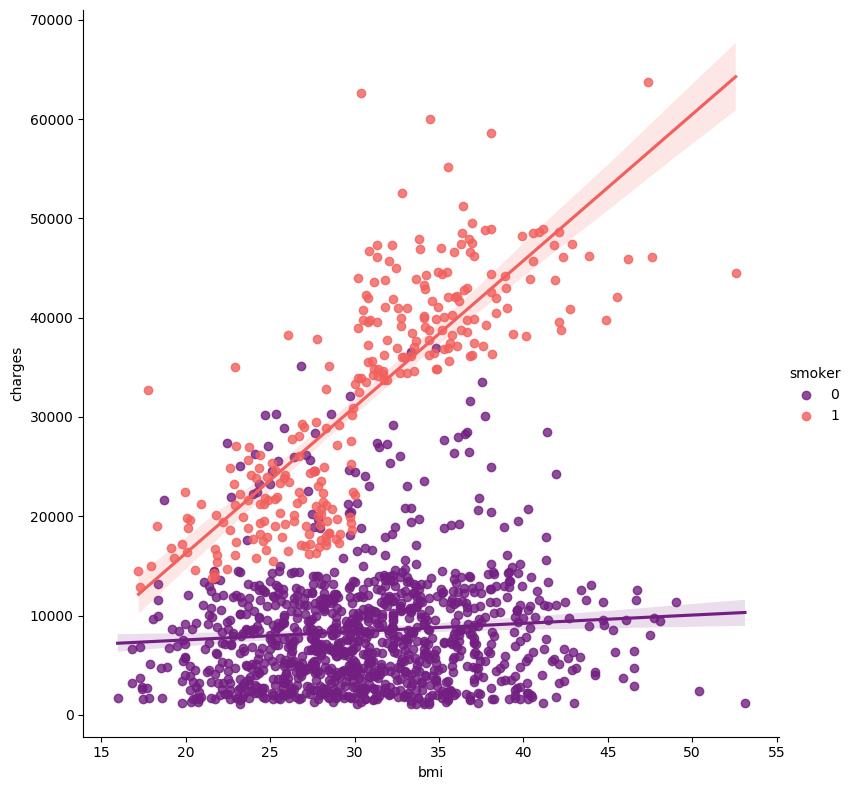

In [34]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


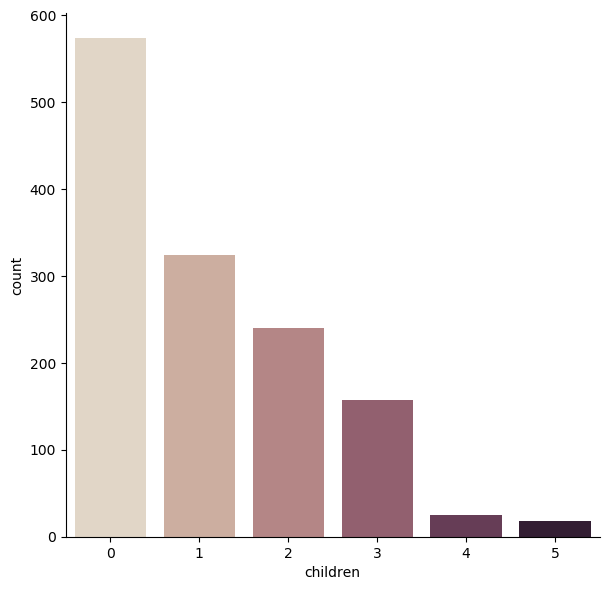

In [35]:
#Analysis on Childern column
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

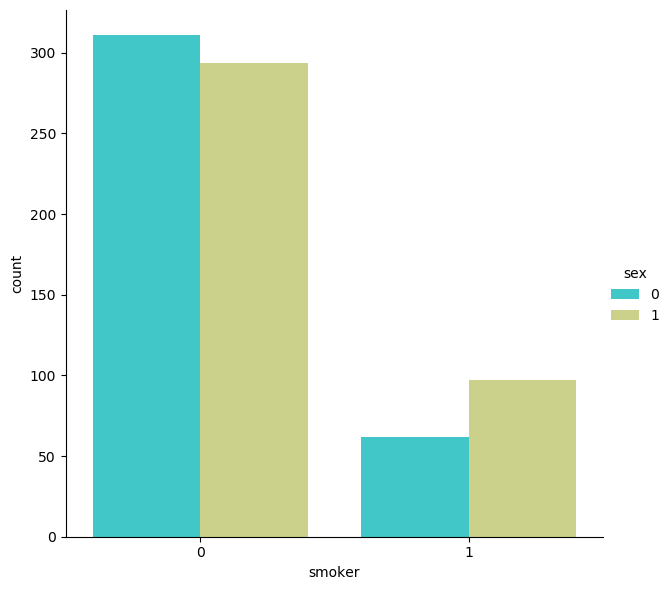

In [36]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

In [54]:
#Model Building

In [37]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.preprocessing import PolynomialFeatures # for adding polynomial features
from sklearn.linear_model import Ridge # for ridge regression
from sklearn.linear_model import Lasso # for lasso regression
from sklearn.svm import SVR # for support vector regression
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
# hyptertuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# extra
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

In [88]:
from sklearn.model_selection import train_test_split

X = data.drop(['charges'], axis = 1)
y = data.charges



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1070, 6), X_test size: (268, 6)


In [39]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [89]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1070, 6)
Shape of X_test:  (268, 6)
Shape of y_train:  (1070,)
Shape of y_test (268,)


In [65]:
#Linear Regression

In [90]:
# Creating the linear regressor
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X, y = y, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7448047213193173
R2_score (train):  0.7368306228430945
R2_score (test):  0.799874714544996
RMSE:  5643.2197488809015


In [70]:
#Polynomial Regression - 2nd degree

In [92]:
# Creating the polynomial features and regressor
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_train_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_poly, y = y, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.7882838456464156
R2_score (train):  0.8155957567827489
R2_score (test):  0.8648639616622378
RMSE:  4637.261334996059


In [73]:
#Ridge Regression

In [94]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [95]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:[200, 230, 250,265, 270, 275, 290, 300, 500] -> 200
# step 2: alpha:[10,50,100,150,200] -> 50
# step 3: alpha: np.arange(30, 75, 1) -> 43

parameters =  {  'model__alpha' : [43],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42] 
}
regressor_ridge = GridSearchCV(ridge_pipe, parameters, iid=False, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [96]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.8384922839110219
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [97]:
# Predicting Cross Validation Score the Test set results
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score the Test set results
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8384922839110219
R2_score (train):  0.8352566031641522
R2_score (test):  0.8861484555991458
RMSE:  4256.429486180142


In [49]:
#Lasso Regression

In [98]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [99]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:np.arange(0.01, 1, 0.005) -> 0.9949

parameters =  {  'model__alpha' : [0.9949],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__max_iter' : [5000],
                'model__random_state': [42] 
}
regressor_lasso = GridSearchCV(lasso_pipe, parameters, iid=False, cv=10, n_jobs = -1, verbose = 4)
regressor_lasso = regressor_lasso.fit(X, y.ravel())

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [100]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_

# Predicting R2 Score the Test set results
y_pred_lasso_train = regressor_lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = regressor_lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.8384464197870859
R2_score (train):  0.8354818747214346
R2_score (test):  0.8866713683658471
RMSE:  4246.643484207358


In [82]:
#Support Vector Regression 

In [101]:
# Feature Scaling
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.values.reshape(-1,1))



regressor_svr = SVR()

In [102]:
# Applying Grid Search to find the best model and the best parameters
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
regressor_svr = GridSearchCV(estimator = regressor_svr,
                           param_grid = parameters,
                           cv = 10,
                           verbose = 4,
                           iid = True,
                           n_jobs = -1)
regressor_svr = regressor_svr.fit(X_scaled, y_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.4min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [103]:
print(regressor_svr.best_params_)
print(regressor_svr.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 0.0001}
0.8434137833604224


In [104]:
# Predicting Cross Validation Score
cv_svr = regressor_svr.best_score_

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.8434137833604224
R2_score (train):  0.8492896356817686
R2_score (test):  0.9034650148405542
RMSE:  3919.3887981660564


In [90]:
#Decision Tree Regression

In [105]:
# Creating the Decision Tree regressor
regressor_dt = DecisionTreeRegressor(random_state = 42)

In [106]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "max_depth": np.arange(1,21),
              "min_samples_leaf": [1, 5, 10, 20, 50, 100],
              "min_samples_split": np.arange(2, 11),
              "criterion": ["mse"],
              "random_state" : [42]}
            ]
regressor_dt = GridSearchCV(estimator = regressor_dt,
                           param_grid  = parameters,
                           cv = 10,
                           verbose = 4,
                           iid = False,
                           n_jobs = -1)
regressor_dt = regressor_dt.fit(X_scaled, y_scaled)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1014 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 4470 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 9942 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:   41.8s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [107]:
print(regressor_dt.best_params_)
print(regressor_dt.best_score_)

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
0.8529253297891678


In [108]:
# Predicting Cross Validation Score
cv_dt = regressor_dt.best_score_

# Predicting R2 Score the Train set results
y_pred_dt_train = sc_y.inverse_transform(regressor_dt.predict(sc_X.transform(X_train)))
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = sc_y.inverse_transform(regressor_dt.predict(sc_X.transform(X_test)))
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8529253297891678
R2_score (train):  0.868203444850574
R2_score (test):  0.910289994905033
RMSE:  3778.2998465817645


In [95]:
#Random Forest Regresson

In [109]:
# Creating the Random Forest regressor
regressor_rf = RandomForestRegressor()

In [97]:
#Grid search cv & Random search cv

In [98]:
# RANDOM SEARCH - STEP 1 - TOOK 17.6 MINUTES
#parameters =  { "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#                "max_features": ["auto", "sqrt"],
#                "max_depth": np.linspace(10, 110, num = 11),
#                "min_samples_split": [2, 5, 10],
#                "min_samples_leaf": [1, 2, 4],
#                "bootstrap": [True, False],
#                "criterion": ["mse"],
#                "random_state" : [42] }
#            
#regressor_rf = RandomizedSearchCV(estimator = regressor_rf,
#                                  param_distributions = parameters,
#                                  n_iter = 100,
#                                  cv = 10,
#                                  random_state=42,
#                                  verbose = 4,
#                                  n_jobs = -1)
#regressor_rf = regressor_rf.fit(X_scaled, y.ravel())
#
# Best Parameters and Score:
# {'random_state': 42, 'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50.0, 'criterion': 'mse', 'bootstrap': True}
# 0.8541297253461337

In [110]:
# GRID SEARCH - STEP 2 - TOOK 1.5 MINUTES
parameters =  { "n_estimators": [1200],
                "max_features": ["auto"],
                "max_depth": [50],
                "min_samples_split": [7,10,13],
                "min_samples_leaf": [4,7,10],
                "bootstrap": [True],
                "criterion": ["mse"],
                "random_state" : [42] }
            
regressor_rf = GridSearchCV(estimator = regressor_rf,
                                  param_grid = parameters,
                                  cv = 10,
                                  verbose = 4,
                                  n_jobs = -1)
regressor_rf = regressor_rf.fit(X_scaled, y.ravel())

# Best Parameters and Score:
# {'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
# 0.8587579970188238

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.3min finished


In [111]:
# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
          regressor_rf.best_estimator_)
print("\n The best score across ALL searched params:\n",
          regressor_rf.best_score_)
print("\n The best parameters across ALL searched params:\n",
          regressor_rf.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8589424654248564

 The best parameters across ALL searched params:
 {'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}



In [112]:
print(regressor_rf.best_params_)
print(regressor_rf.best_score_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
0.8589424654248564


In [113]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = regressor_rf.best_score_

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(sc_X.transform(X_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(sc_X.transform(X_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8589424654248564
R2_score (train):  0.8834024744790594
R2_score (test):  0.9257909432226971
RMSE:  3436.405739858537


In [ ]:
#Measuring the error

In [114]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [115]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5643.219749,0.736831,0.799875,0.744805
1,Polynomial Regression (2nd),4637.261335,0.815596,0.864864,0.788284
2,Ridge Regression,4256.429486,0.835257,0.886148,0.838492
3,Lasso Regression,4246.643484,0.835482,0.886671,0.838446
4,Support Vector Regression,3919.388798,0.849290,0.903465,0.843414
5,Decision Tree Regression,3778.299847,0.868203,0.910290,0.852925
6,Random Forest Regression,3436.405740,0.883402,0.925791,0.858942


In [116]:
#Visualize model performance

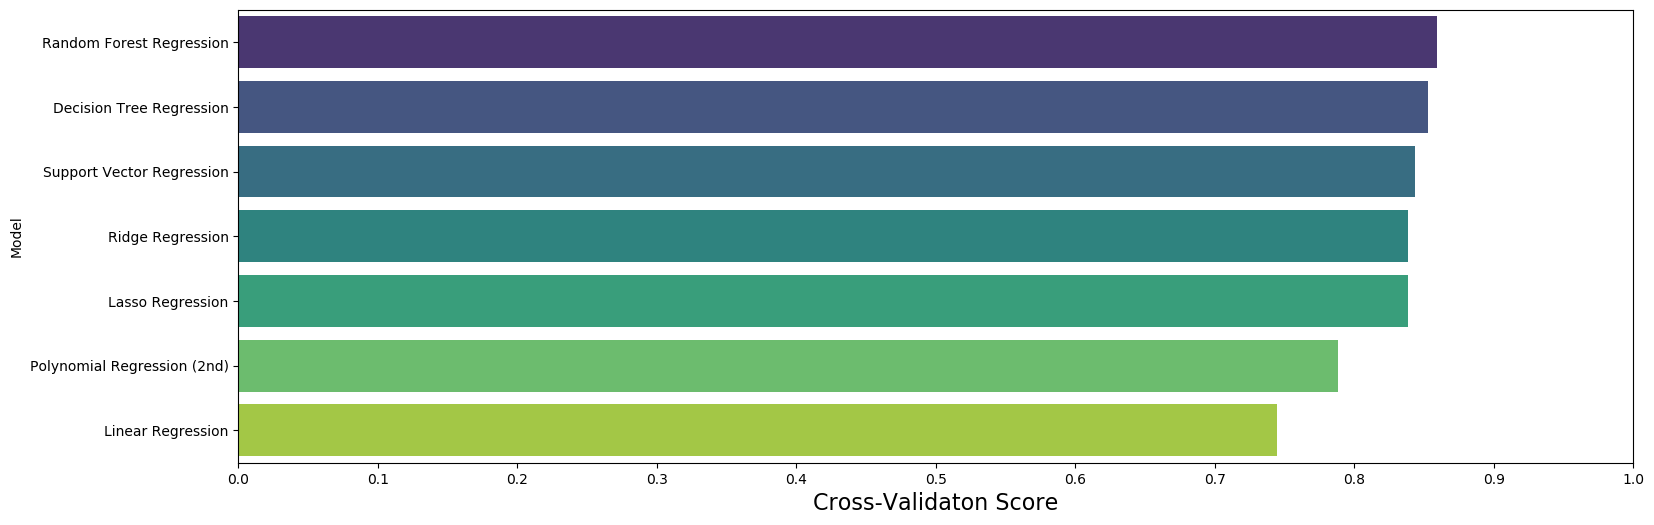

In [117]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

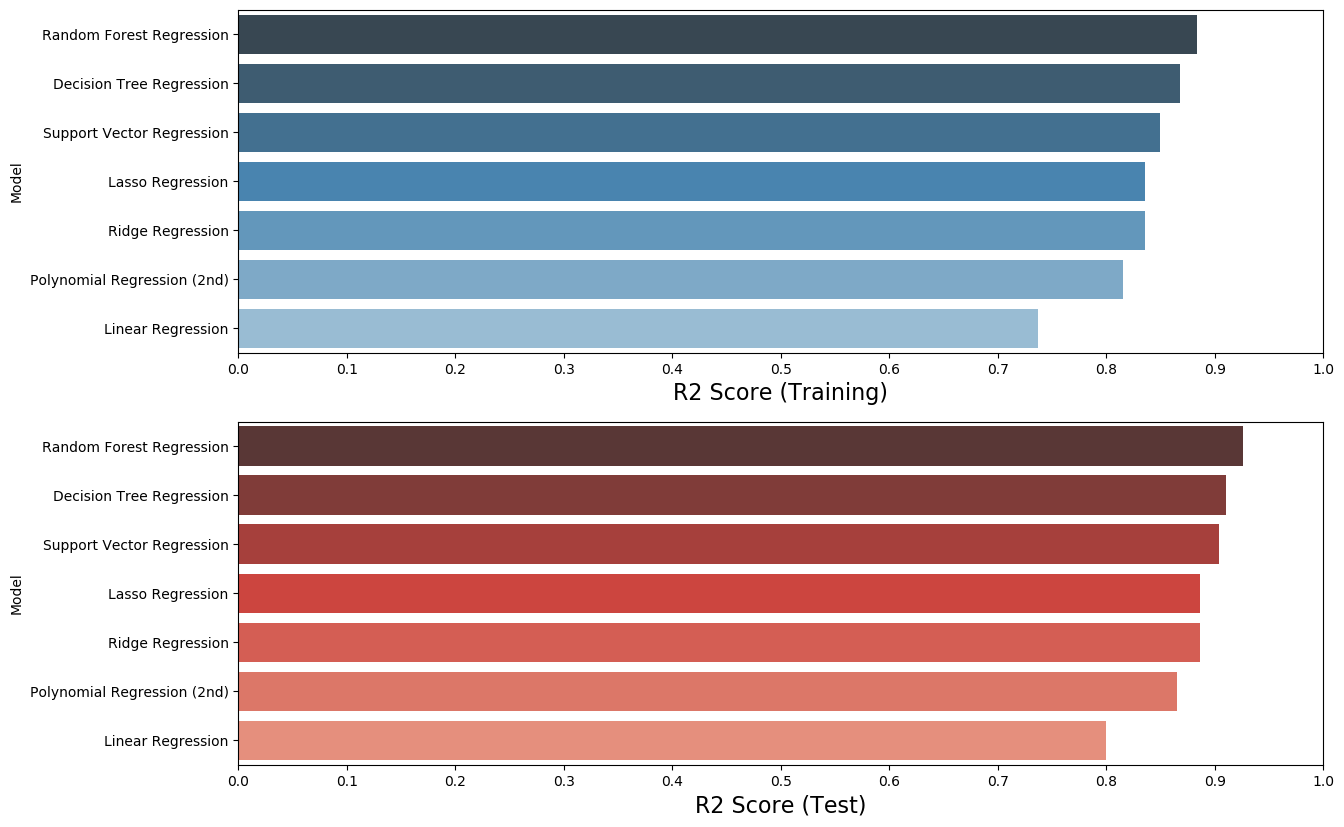

In [118]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

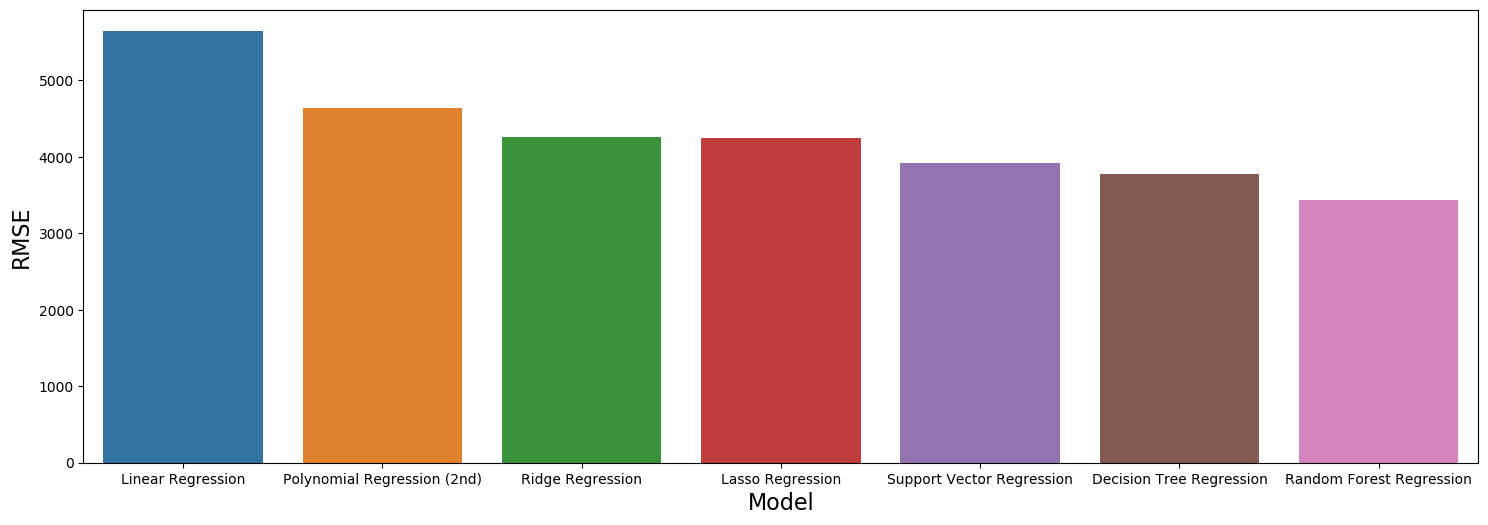

In [119]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

In [121]:
#Consulsion - Random forest regressor fits best by evaluating R2 score and RMSE 

In [124]:
# Creating a pickle file for the classifier
import pickle
filename = 'insurance-prediction-rfr-model.pkl'
pickle.dump(regressor_rf, open(filename, 'wb'))